In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import json

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement

In [ ]:
Problem Statement : To predict charges of medical insurance by using various features
    
    Features :
        
        'age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges',
        

### 2. Data Gathering

In [3]:
df = pd.read_csv('medical_insurance.csv')

df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3. EDA and Features Engineering

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### 1. Gender

In [20]:
df['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [21]:
df['gender'].replace({'male': 1, 'female': 0},inplace = True)

df['gender']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: gender, Length: 1338, dtype: int64

In [22]:
gender_data = {'male': 1, 'female': 0}

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


#### 2. Smoker

In [24]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [25]:
df['smoker'].replace({'yes': 1, 'no': 0}, inplace = True)

df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [26]:
smoker_data = {'yes': 1, 'no': 0}

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


#### 3. Region

In [28]:
df['region'].value_counts()  # nominal data

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [29]:
df = pd.get_dummies(df, columns = ['region'])

In [30]:
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   gender            1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


### 4. Feature Selection

In [ ]:
1. Linearity
2. VIF

#### 1. Linearity

In [32]:
df.corr()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [33]:
df.corr()[['charges']]

,charges
age,0.299008
gender,0.057292
bmi,0.198341
children,0.067998
smoker,0.787251
charges,1.000000
region_northeast,0.006349
region_northwest,-0.039905
region_southeast,0.073982
region_southwest,-0.043210


<AxesSubplot:>

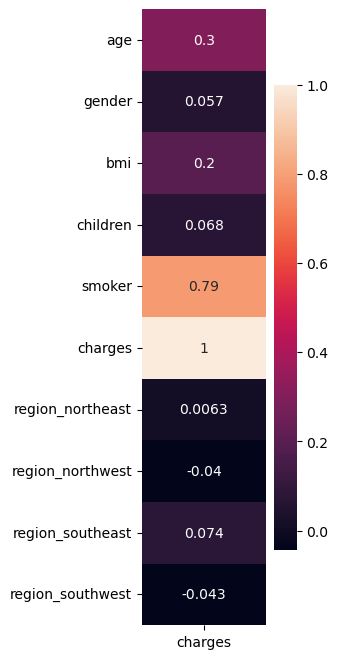

In [34]:
plt.figure(figsize = (2,8))
sns.heatmap(df.corr()[['charges']], annot = True)

#### 2. VIF

In [37]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [38]:
variance_inflation_factor(x.to_numpy(),0)

1.0168221490038105

In [39]:
variance_inflation_factor(x.to_numpy(),3)

1.004010642137024

In [40]:
variance_inflation_factor(x.to_numpy(),1)

1.0089001621005735

### Model Training

In [36]:
x = df.drop('charges', axis = 1)

y = df['charges']

In [41]:
x

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [42]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 13)

In [44]:
x_train

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
291,29,1,29.640,1,0,1,0,0,0
671,29,0,31.160,0,0,1,0,0,0
836,36,1,31.500,0,0,0,0,0,1
231,59,0,27.830,3,0,0,0,1,0
1100,33,0,19.095,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
866,18,1,37.290,0,0,0,0,1,0
742,53,1,34.105,0,1,1,0,0,0
74,44,1,27.400,2,0,0,0,0,1
176,38,1,27.835,2,0,0,1,0,0


In [45]:
y_train

291     20277.80751
671      3943.59540
836      4402.23300
231     14001.28670
1100    16776.30405
           ...     
866      1141.44510
742     43254.41795
74       7726.85400
176      6455.86265
338     41919.09700
Name: charges, Length: 1070, dtype: float64

In [46]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

### 6. Model Evaluation

In [47]:
y_pred = linear_reg.predict(x_test)
y_pred

array([ 3600.84757824, 10353.60606981,  7247.53040669,  6661.27764925,
        2543.96751265, 16353.71187466, 13658.07752938,  5407.47201226,
       32184.48705221, 28661.81941062,  9181.95449826, 10326.60596382,
        3468.81409881,  6390.60700372,  7406.40170852,  7216.07431951,
       33337.21850759, 30435.99649089, 15041.78017196,   417.66188896,
        7706.74587818,  5550.53832266, 28454.75485623, 14792.61767992,
       40437.05958329, 28379.04013371, 33719.22121508,  2895.81735814,
       10898.08517778, 15444.68848735, 12219.88584049, 28664.5614591 ,
        2924.27600095,  7471.7696333 , 37473.40435954, 26924.3359047 ,
        6674.21708208, 11622.9167336 , 35962.88120372,  4728.00587943,
        8580.14434213, 18458.94344207, 10430.78103491,  8618.62862778,
         965.43255995,  5947.80201163, 15768.93345927,  5863.38473425,
        2336.3259301 , 10569.92039868, 32666.28905913, 33926.58292985,
        7721.41769839,  9953.79415389, 14294.27378064,  5491.85515848,
      

In [48]:
y_test[5:10]

1132    20709.02034
33      13770.09790
898      1634.57340
819     55135.40209
1021    35595.58980
Name: charges, dtype: float64

In [49]:
y_pred[5:10]

array([16353.71187466, 13658.07752938,  5407.47201226, 32184.48705221,
       28661.81941062])

In [50]:
residual = y_test - y_pred
residual

200    -1470.171678
350     1477.001130
226    -4558.035007
709    -1192.271049
293     -387.215713
           ...     
287     1321.530347
433     -312.536638
66     -2939.117687
1185      -4.014820
1276   -1217.011987
Name: charges, Length: 268, dtype: float64

### Normality of Residuals

### 1. visualization

##### 1.1 kdeplot

<AxesSubplot:xlabel='charges', ylabel='Density'>

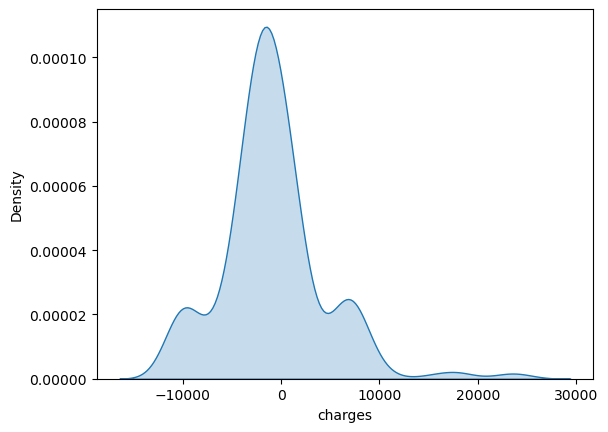

In [51]:
sns.kdeplot(residual, fill = True)

##### 1.2 histplot

<AxesSubplot:xlabel='charges', ylabel='Count'>

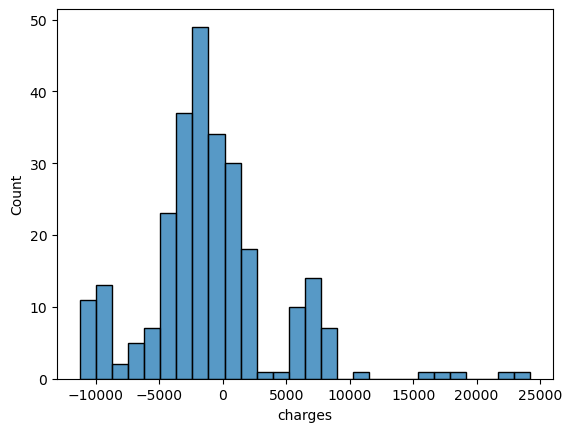

In [52]:
sns.histplot(residual)

### 2. QQ plot

In [53]:
import statsmodels.api as sm

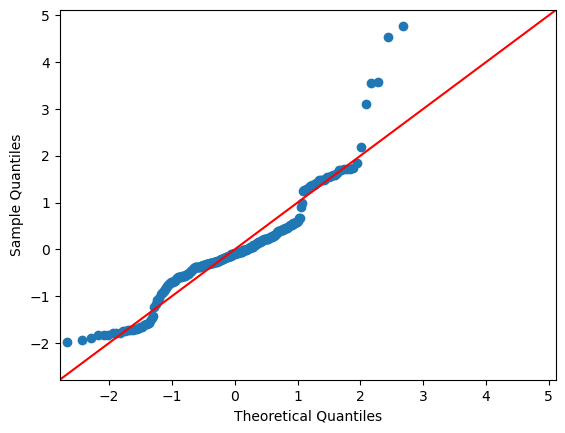

In [54]:
sm.qqplot(residual, line ='45', fit = True)
plt.show()

### 3. Hypothesis Testing

#### 3.1 Shapiro

In [55]:
from scipy.stats import shapiro

In [56]:
_, p_val = shapiro(residual)
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 1.0738407558996688e-11
Data is not normally distributed
Alternate Hypothesis is True


#### 3.2 Kstest

In [57]:
from scipy.stats import kstest

In [58]:
_, p_val = kstest(residual, 'norm')
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 8.439722149355793e-117
Data is not normally distributed
Alternate Hypothesis is True


### 4. Homoscedascticity

In [59]:
y_train

291     20277.80751
671      3943.59540
836      4402.23300
231     14001.28670
1100    16776.30405
           ...     
866      1141.44510
742     43254.41795
74       7726.85400
176      6455.86265
338     41919.09700
Name: charges, Length: 1070, dtype: float64

In [63]:
residual_train = y_train - y_pred_train
residual_train

291     14242.590203
671     -2077.983539
836     -2716.043942
231       702.067075
1100   -11018.850728
            ...     
866     -3266.959590
742      6221.931234
74      -1095.560598
176     -1636.215233
338      5755.046809
Name: charges, Length: 1070, dtype: float64

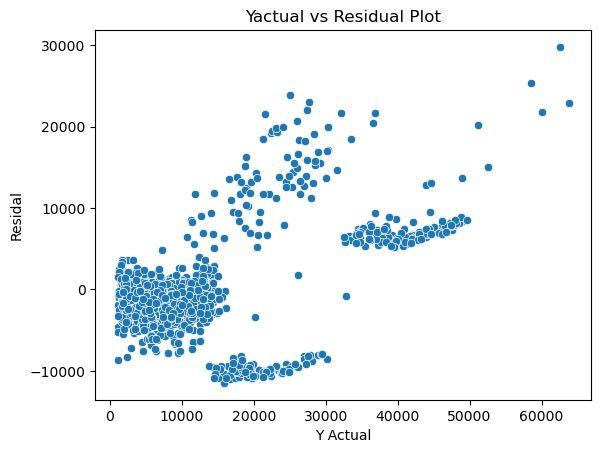

In [64]:
sns.scatterplot(x = y_train, y = residual_train)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual vs Residual Plot")
plt.savefig("Homoscedasticity.png")

In [61]:
# testing data evaluation

mse = mean_squared_error(y_test, y_pred)
print("MSE : ", mse)

rmse = np.sqrt(mse)
print("RMSE : ", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE : ", mae)

r2_value = r2_score(y_test , y_pred)
print("R-Squared :",r2_value)

MSE :  28560666.713329997
RMSE :  5344.218063789126
MAE :  3820.7706849786387
R-Squared : 0.7990637930035749


In [62]:
y_pred_train = linear_reg.predict(x_train)

In [65]:
# testing data evaluation

mse = mean_squared_error(y_train, y_pred_train)
print("MSE : ", mse)

rmse = np.sqrt(mse)
print("RMSE : ", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE : ", mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared :",r2_value)

MSE :  38548913.01313226
RMSE :  6208.777094817647
MAE :  4333.6969516595445
R-Squared : 0.7385339139130735


In [66]:
df.head(1).T

,0
age,19.000
gender,0.000
bmi,27.900
children,0.000
smoker,1.000
charges,16884.924
region_northeast,0.000
region_northwest,0.000
region_southeast,0.000
region_southwest,1.000


### Single Row Testing

In [67]:
x_test[45:46]

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
253,27,1,30.3,3,0,0,0,0,1


In [68]:
linear_reg.predict(x_test[45:46])[0]

5947.802011631362

In [69]:
age = 29
gender = 'male'
bmi = 28.265
children = 2
smoker = 'yes'
region = 'southeast'

In [ ]:
gender_data = {'male': 1, 'female': 0}
smoker_data = {'yes': 1, 'no': 0}

In [70]:
gender_data

{'male': 1, 'female': 0}

In [71]:
column_names = x.columns.tolist()
column_names

['age',
 'gender',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [72]:
gender = gender_data[gender]
smoker = smoker_data[smoker]

region = 'region_'+region
region

'region_southeast'

In [73]:
linear_reg.n_features_in_

9

In [74]:
x_train.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [75]:
test_array = np.zeros((1, linear_reg.n_features_in_))
test_array[0,0] = age
test_array[0,1] = gender
test_array[0,2] = bmi
test_array[0,3] = children
test_array[0,4] = smoker
test_array

array([[29.   ,  1.   , 28.265,  2.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ]])

In [76]:
region_index = x_train.columns.tolist().index(region)
region_index

7

In [77]:
test_array[0][region_index] = 1

In [78]:
test_array

array([[29.   ,  1.   , 28.265,  2.   ,  1.   ,  0.   ,  0.   ,  1.   ,
         0.   ]])

In [79]:
predicted_charges = np.around(linear_reg.predict(test_array)[0],3)

print("Predict Medical Insurance Charges --> ", predicted_charges)

Pridict Medical Insurance Charges -->  29020.738


In [80]:
with open('Medical_Insurance.pkl','wb') as f:
    pickle.dump(linear_reg, f)

In [81]:
project_data = {"Gender": gender_data,
               "Smoker":smoker_data,
               "Column Names" : column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)